# Задача классификации. Линейный классификатор



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDClassifier

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv', delimiter=',')
df_cut=df[['Growth','Weight','Sex']]
df_cut=df_cut.dropna()

<Axes: xlabel='Weight', ylabel='Growth'>

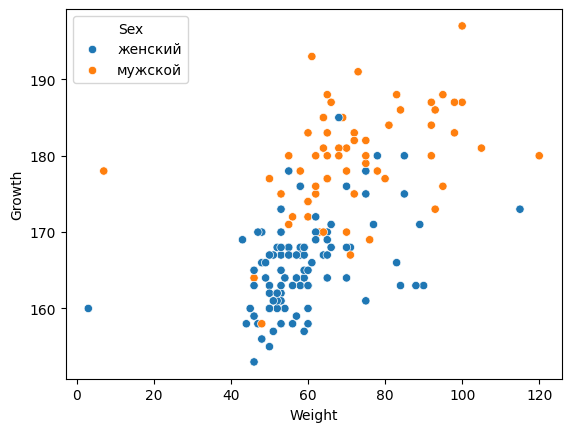

In [4]:
sns.scatterplot(data=df_cut, x='Weight', y='Growth', hue='Sex')

Гипотеза: мужчины и женщины образуют два облака. Эти облака можно попытаться разделить прямой линией.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_cut[['Weight', 'Growth']].values.reshape(-1, 2))
arr=scaler.transform(df_cut[['Weight', 'Growth']].values.reshape(-1, 2))

In [6]:
model=SGDClassifier()
model.fit(arr, y=df_cut['Sex'].values)

SGDClassifier()

Загружаем тестовую выбоку

In [7]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Growth','Weight','Sex']]
df_test_cut=df_test_cut.dropna()

In [8]:
arr_test=scaler.transform(df_test_cut[['Weight', 'Growth']].values.reshape(-1, 2))

Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [9]:
df_test_cut['Predicted']=model.predict(arr_test)

In [10]:
df_test_cut.head()

,Growth,Weight,Sex,Predicted
0,180.0,78.0,мужской,мужской
1,167.0,50.0,женский,женский
2,178.0,70.0,женский,мужской
3,156.0,47.0,женский,женский
4,186.0,94.0,мужской,мужской


Метрики качества задачи классификации

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [12]:
print(accuracy_score(df_test_cut['Predicted'], df_test_cut['Sex']))
# это процент правильно классифицированных объектов

0.8311688311688312


In [13]:
print(precision_score(df_test_cut['Predicted'], df_test_cut['Sex'],average=None, zero_division=1))
print(recall_score(df_test_cut['Predicted'], df_test_cut['Sex'],average=None, zero_division=1))

[0.72340426 1.        ]
[1.         0.69767442]


In [14]:
pd.crosstab(df_test_cut['Predicted'],df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,34,0
мужской,13,30


In [15]:
df_test_cut['Code']='0'
df_test_cut.loc[(df_test_cut['Sex']=='мужской') & (df_test_cut['Predicted']=='женский'),'Code']='1'
df_test_cut.loc[(df_test_cut['Sex']=='женский') & (df_test_cut['Predicted']=='мужской'),'Code']='2'

<Axes: xlabel='Weight', ylabel='Growth'>

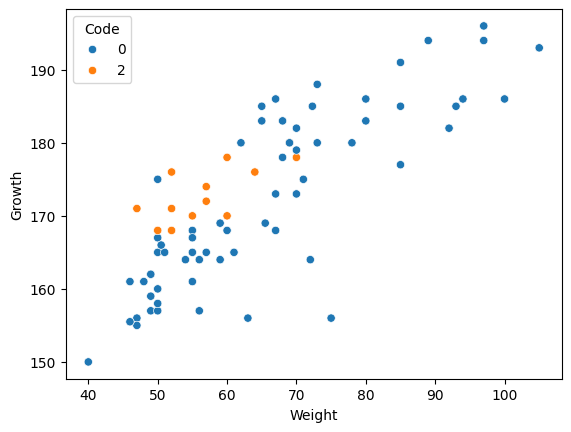

In [16]:
sns.scatterplot(data=df_test_cut, x='Weight', y='Growth', hue='Code')

In [17]:
df_cut=df[['Hair length','Shoe size','Sex']]


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_cut[['Hair length','Shoe size']].values.reshape(-1, 2))
arr=scaler.transform(df_cut[['Hair length','Shoe size']].values.reshape(-1, 2))


In [19]:
model=SGDClassifier(random_state=0)
model.fit(arr, y=df_cut['Sex'].values)

SGDClassifier(random_state=0)

In [20]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Hair length','Shoe size','Sex']]
df_test_cut=df_test_cut.dropna()

In [21]:
arr_test=scaler.transform(df_test_cut[['Hair length','Shoe size']].values.reshape(-1, 2))

In [22]:
df_test_cut['Predicted']=model.predict(arr_test)

In [23]:
pd.crosstab(df_test_cut['Predicted'],df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,61,1
мужской,1,35
